<a href="https://colab.research.google.com/github/NakulLimbani/Brain_Tumor_Classification/blob/main/Models/Brain__Tumor_Classification_Model_Architecture_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow


In [1]:
import zipfile

# Replace 'dataset.zip' with the name of your zip file
zip_path = '/content/Brain_Tumor_Dataset_Training_ANN.zip'
extract_path = '/content/dataset/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [3]:
import os
from PIL import Image

# Set base path to the location where the files are uploaded
base_path = '/content/dataset/Training'
categories = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

for category in categories:
    folder = os.path.join(base_path, category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        try:
            img = Image.open(img_path)
            img.verify()  # Verify image integrity
        except (IOError, SyntaxError) as e:
            print(f"Corrupt image found: {img_path}")


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


Displaying sample images for category: no_tumor


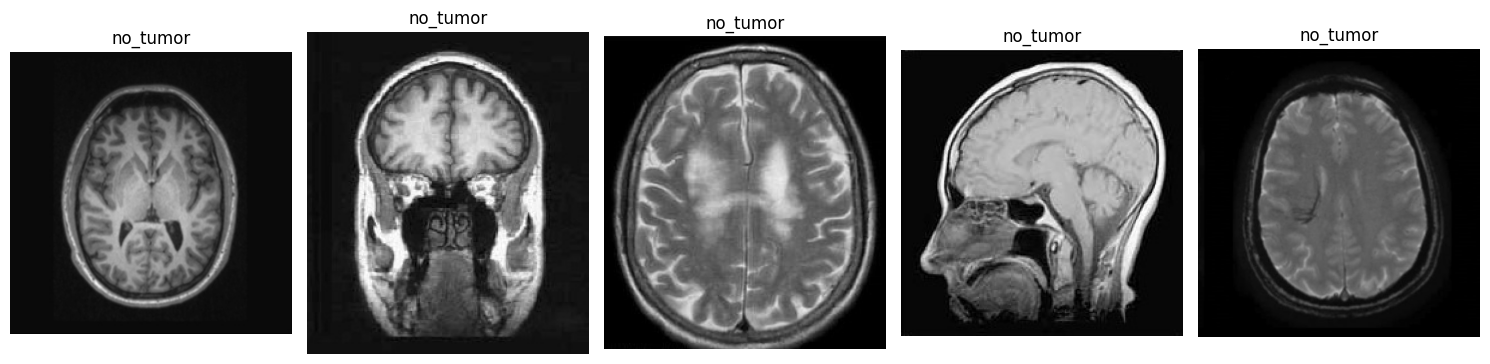

Displaying sample images for category: glioma_tumor


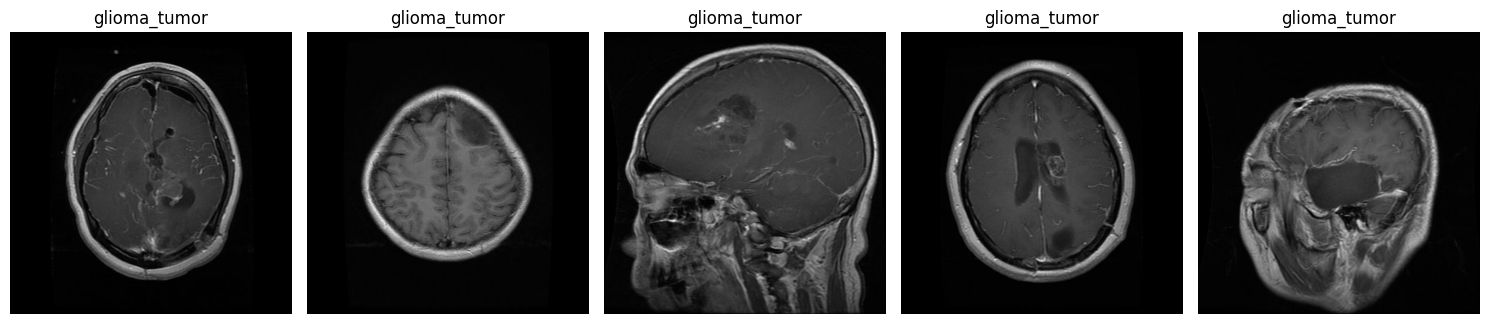

Displaying sample images for category: meningioma_tumor


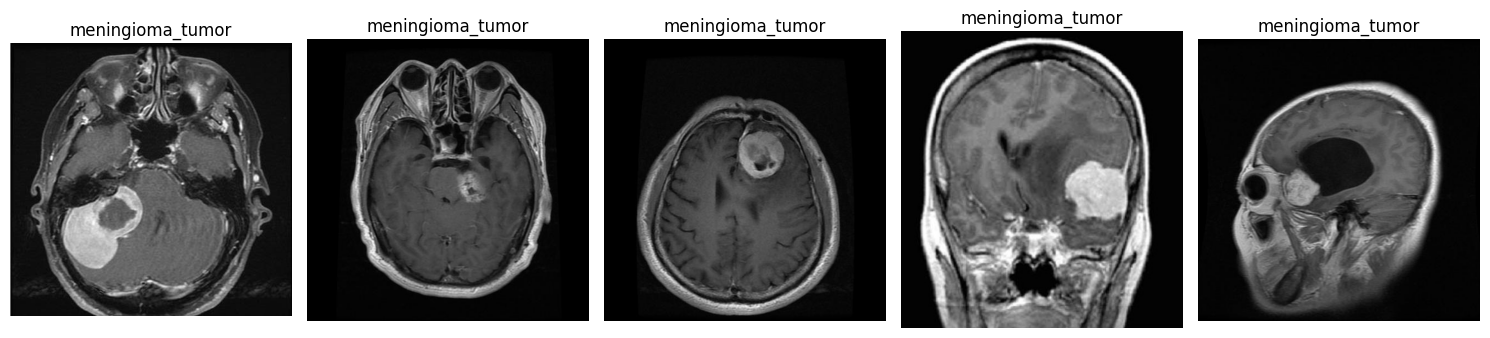

Displaying sample images for category: pituitary_tumor


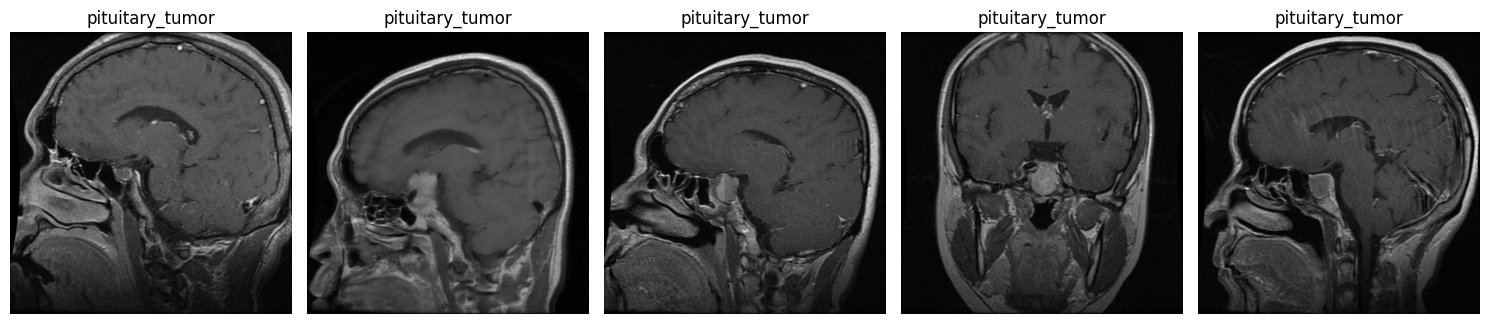

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def display_sample_images(folder_path, category_name, num_samples):
    files = os.listdir(folder_path)
    sample_files = np.random.choice(files, num_samples, replace=False)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    axes = axes.flatten()

    for img_path, ax in zip(sample_files, axes):
        img = Image.open(os.path.join(folder_path, img_path))
        ax.imshow(img)
        ax.set_title(category_name)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images from each category
for category in categories:
    folder = os.path.join(base_path, category)
    print(f"Displaying sample images for category: {category}")
    display_sample_images(folder, category, 5)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [7]:

# Paths to dataset
base_path = '/content/dataset/Training/'

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting data: 80% training, 20% validation
)

# Training and validation generators
train_generator = datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [8]:
# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.3560 - loss: 1.3355 - val_accuracy: 0.4062 - val_loss: 1.2811
Epoch 2/20
 1/71 ━━━━━━━━━━━━━━━━━━━━ 2:44 2s/step - accuracy: 0.4375 - loss: 1.2592

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4375 - loss: 1.2592 - val_accuracy: 0.4138 - val_loss: 1.2556
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.4972 - loss: 1.1515 - val_accuracy: 0.4375 - val_loss: 1.2320
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6562 - loss: 1.0111 - val_accuracy: 0.5517 - val_loss: 1.1947
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.5322 - loss: 1.0452 - val_accuracy: 0.4688 - val_loss: 1.1383
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6562 - loss: 0.9202 - val_accuracy: 0.5517 - val_loss: 1.0511
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5944 - loss: 0.9523 - val_accuracy: 0.4798 - val_loss: 1.1382
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5938 - loss: 1.2626 - val_accuracy: 0.4828 - val_loss: 1.2061
Epoch 9/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6287 - loss: 0.8715 - val_accuracy: 0.4761 - val_loss: 1.3615

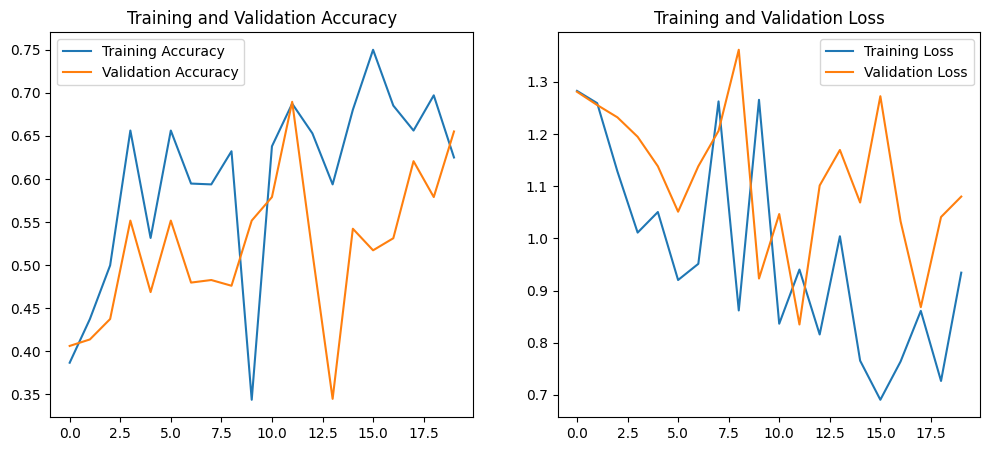

In [10]:
# Plotting Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [11]:
# Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')



18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 593ms/step - accuracy: 0.5876 - loss: 1.0211
Validation Accuracy: 57.24%


In [12]:
# Save the model
model.save('brain_tumor_classifier.h5')

In [13]:
# Predictions for confusion matrix
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 631ms/step


In [14]:
# Confusion Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[74 18 26 47]
 [82 17 21 44]
 [40  7  5 27]
 [81  7 22 55]]
Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.27      0.45      0.33       165
meningioma_tumor       0.35      0.10      0.16       164
        no_tumor       0.07      0.06      0.07        79
 pituitary_tumor       0.32      0.33      0.33       165

        accuracy                           0.26       573
       macro avg       0.25      0.24      0.22       573
    weighted avg       0.28      0.26      0.24       573



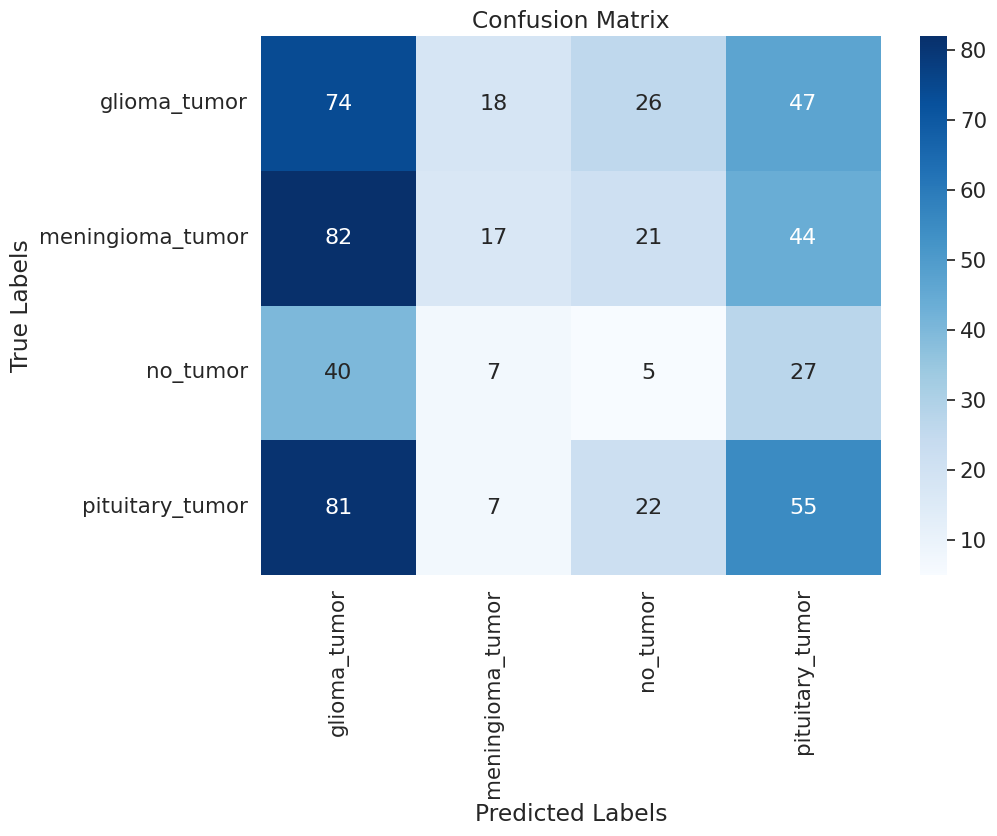

Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.27      0.45      0.33       165
meningioma_tumor       0.35      0.10      0.16       164
        no_tumor       0.07      0.06      0.07        79
 pituitary_tumor       0.32      0.33      0.33       165

        accuracy                           0.26       573
       macro avg       0.25      0.24      0.22       573
    weighted avg       0.28      0.26      0.24       573



In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming 'y_pred' contains the predicted labels and 'validation_generator.classes' contains the true labels
# Calculate the confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)  # font size

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the classification report for additional metrics
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


# **Prediction for user image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


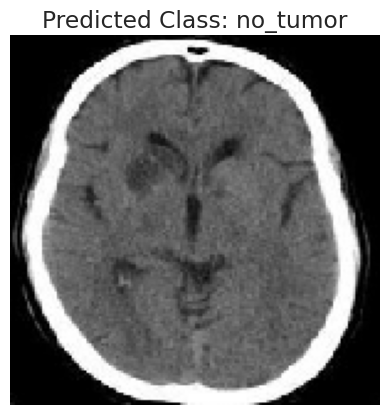

The predicted class is: no_tumor


In [18]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model_path = '/content/brain_tumor_classifier.h5'
model = load_model(model_path)

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # Adjust target_size to match the model's input shape
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Make it (1, 150, 150, 3)
    img_array /= 255.0  # Model was trained with normalized images
    return img_array

# Function to make predictions
def predict_image(image_path):
    processed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)

    # Mapping the class indices to class labels
    labels = {0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
    predicted_label = labels[predicted_class[0]]

    plt.imshow(processed_image[0])
    plt.title(f'Predicted Class: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label

# Example usage
image_path = '/content/dataset/Training/no_tumor/image(11).jpg'  # Replace with your image path
predicted_class = predict_image(image_path)
print(f'The predicted class is: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


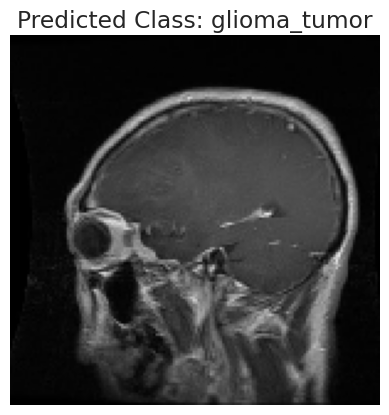

The predicted class is: glioma_tumor


In [19]:
# Example usage
image_path = '/content/dataset/Training/glioma_tumor/gg (186).jpg'  # Replace with your image path
predicted_class = predict_image(image_path)
print(f'The predicted class is: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


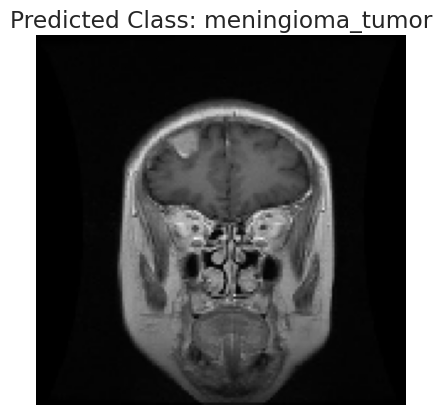

The predicted class is: meningioma_tumor


In [21]:
# Example usage
image_path = '/content/dataset/Training/meningioma_tumor/m (36).jpg'  # Replace with your image path
predicted_class = predict_image(image_path)
print(f'The predicted class is: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


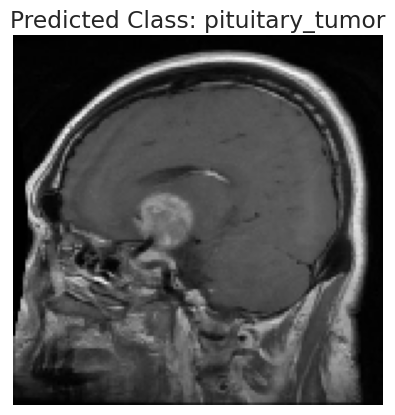

The predicted class is: pituitary_tumor


In [22]:
# Example usage
image_path = '/content/dataset/Training/pituitary_tumor/p (151).jpg'  # Replace with your image path
predicted_class = predict_image(image_path)
print(f'The predicted class is: {predicted_class}')